# Notebook contents: 

This notebook contains a lecture. The code for generating plots are found at the of the notebook. Links below.

- [presentation](#Python-plotting)
- [code for plots](#Code-for-plots)

# Session 5:
## Python plotting

*Andreas Bjerre-Nielsen*

# Reminders
- Why so many exercises
- APIs, replacing values
- 9am means 9.15, 1pm means 13.15
*Andreas Bjerre-Nielsen*

# Recap
*What have we learned about basic Python and Pandas?*

-

- 

# Agenda

1. [Background on plotting](#Understanding plotting)
2. The [Python toolbox for plotting](#Python-plotting)
3. Plots for one variable: [numeric](#Plotting-one-numerical-variable) and [categorical](#Plotting-one-categorical-variable)
4. Plots for two variables: [numeric](#Plots-of-two-numeric-variables) and [categorical](#Plots-with-categorical-variables)
5. [Advanced exploratory plotting](#Advanced-exploratory-plotting)  

# Understanding plotting

## What values do A,B,C,D have?
<center><img src='https://raw.githubusercontent.com/abjer/sds2017/master/slides/figures/excel1.png'></center>

## The shocking answer
<center><img src='https://raw.githubusercontent.com/abjer/sds2017/master/slides/figures/excel2.png'></center>


## Why are you plotting?
*Who's the audience?*

Others

- **Explanatory** plots: polished figures to convey your message

Yourself:

- **Exploratory** plots: fast for understanding data - minimal polishing.

## How should you plot (1)
*What are some tips for making **explanatory** plots in a report?*

1. Self explanatory
  - Contain axis label, title, footnotes in text containing relevant information.
1. Eye candy
  - Choose the right plot type.
  - Make sure font size, colors, line width.
1. Narratives - should convey key point(s)
  - If you to show difference between groups in data make sure it is easy to distinguish them.
1. Keep simplicity.
  - Anything unnecessary should be removed, see [this post](https://www.darkhorseanalytics.com/blog/data-looks-better-naked/).

## How should you plot (2)
*What is some practical advice on making **explanatory** plots?*

1. Try out a few plot types, using exploratory analysis.
1. Apply the *"layered grammer of graphics"*.
    - Start with an empty canvas
    - Fill the necessary things (axis, ticks, bars/lines, labels)

## How should you plot (3)
*What are some guidelines on making plots in **general**?*

Be aware of *what* you plot
- numerical vs. non-numeric (categorical)
- raw data vs. model results 

# Python plotting 

## Packages for Python plotting (1)
*What is the fundamental tool for making plots in Python?*

**Matplotlib** is the fundamental plotting module
- Can make almost any 2d plot.
- Can build publication ready figures.
- Caveat: 
    - requires time consuming customization;
    - requires practice.

In [2]:
import matplotlib.pyplot as plt

# allow printing in notebook
%matplotlib inline 

## Packages for Python plotting (2)
*What are good tools for fast, exploratory plots?*

`seaborn` has built-in capabilities to make plots
- Analyzing data, e.g. splitting by subsets
- Make interpolation of data to smooth noise.

`pandas` can easily convert Series and DataFrames to plots

In [ ]:
import pandas as pd
import seaborn as sns # high level plotting library

## Packages for Python plotting (3)
Seaborn comes with some illustrative datasets. We load `iris` and `tips`.



In [4]:
iris = sns.load_dataset('iris')
tips = sns.load_dataset('tips')

# Plotting one numerical variable

## The data
*What does the `tips` data contain?*

In [7]:
print(tips.head(3))
print(len(tips))
tips.total_bill.value_counts()

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
244


13.42    3
10.33    2
20.29    2
18.29    2
17.92    2
21.01    2
13.81    2
15.69    2
15.98    2
13.00    2
20.69    2
7.25     2
10.07    2
10.34    2
17.82    1
25.21    1
10.09    1
12.54    1
14.52    1
27.05    1
12.02    1
24.27    1
11.35    1
16.21    1
10.77    1
38.01    1
41.19    1
43.11    1
14.15    1
15.38    1
        ..
20.23    1
27.28    1
12.69    1
12.74    1
20.90    1
11.61    1
11.59    1
8.58     1
8.51     1
16.93    1
15.01    1
28.15    1
18.35    1
16.40    1
13.13    1
18.15    1
7.56     1
20.65    1
40.55    1
15.77    1
34.30    1
16.97    1
15.95    1
44.30    1
16.58    1
30.40    1
26.59    1
19.65    1
9.55     1
5.75     1
Name: total_bill, Length: 229, dtype: int64

## Univariate distribution (1)
*How did we count categorical data?*

- Using `value_counts`.

Can we do something similar with numeric data?

In [10]:
# cut into categorical data
import numpy as np
x = tips.total_bill
cuts = np.arange(0, 70, 10)
pd.cut(x, cuts).value_counts()

(10, 20]    130
(20, 30]     65
(30, 40]     22
(0, 10]      17
(40, 50]      9
(50, 60]      1
Name: total_bill, dtype: int64

## Univariate distribution (2)
*How do we plot the distribution of numerical variables?*

We often use the histogram. 
- Bins data and counts observations
- Example of tips:

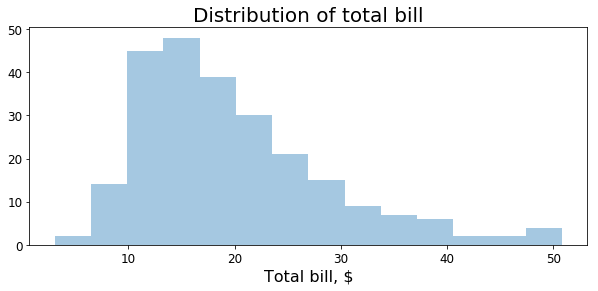

In [12]:
histplot

## Matplotlib and the grammar of graphics (1)
*Where do I start with making a plot?*

We will begin with the fundamental and flexible way. We start with our plotting canvas.

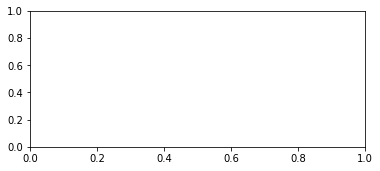

In [13]:
fig, ax = plt.subplots(figsize = (6, 2.5)) # create placeholder for plot

- `ax` contains most of the chart elements: the grid axes, labels, shapes we draw etc.
- `fig` the actual plot which is displayed (export to pdf etc.)

## Matplotlib and the grammar of graphics (2)
We can modify our canvas, e.g the axis scaling:

(0, 80)

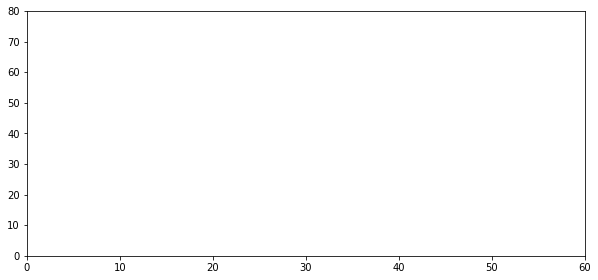

In [14]:
fig, ax = plt.subplots(figsize = (10, 4.5))
ax.set_xlim([0, 60]) # x-axis cutoffs 
ax.set_ylim([0, 80]) # y-axis cutoffs

## Matplotlib and the grammar of graphics (3)
We can draw plots on the canvas

(array([ 7., 42., 68., 51., 31., 19., 12.,  7.,  3.,  4.]),
 array([ 3.07 ,  7.844, 12.618, 17.392, 22.166, 26.94 , 31.714, 36.488,
        41.262, 46.036, 50.81 ]),
 <a list of 10 Patch objects>)

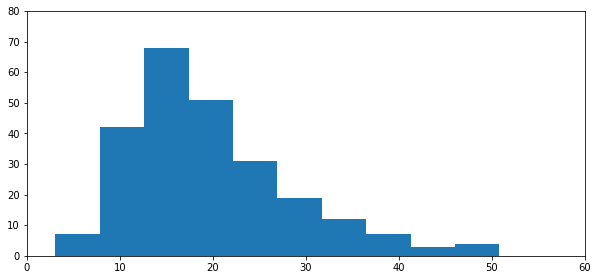

In [15]:
fig, ax = plt.subplots(figsize = (10, 4.5))
ax.set_xlim([0, 60])
ax.set_ylim([0, 80])
ax.hist(x) # make plot

## Matplotlib and the grammar of graphics (4)
What might we change about our plot?
- Font size
- Title

We will try customization in the exercises today.

## Matplotlib and the grammar of graphics (5)
*Can we change matplotlib defaults?*

Yes, this may be very useful. For instance plot size.

In [16]:
plt.style.use('default') # set style (colors, background, size, gridlines etc.)
plt.rcParams['figure.figsize'] = 10, 4 # set default size of plots
plt.rcParams.update({'font.size': 18})

## Plotting with pandas
Pandas has a quick and dirty implemention. Let's try the code below.

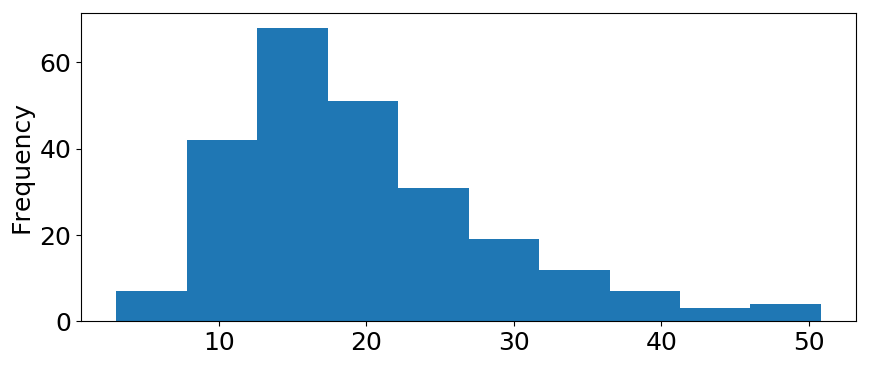

In [18]:
x.plot.hist()

## Plotting with Seaborn (1)
The module Seaborn is great for fast plots that look good

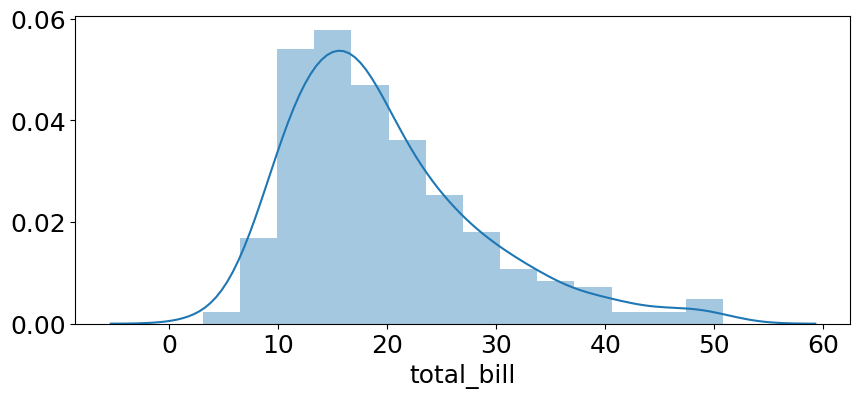

In [19]:
sns.distplot(x)  # histogram for seaborn

Quiz: What is the line?

## Plotting with Seaborn (2)
*Can we use Seaborn for cumulative plots?*

Yes, we specify `cumulative` in the keywords.

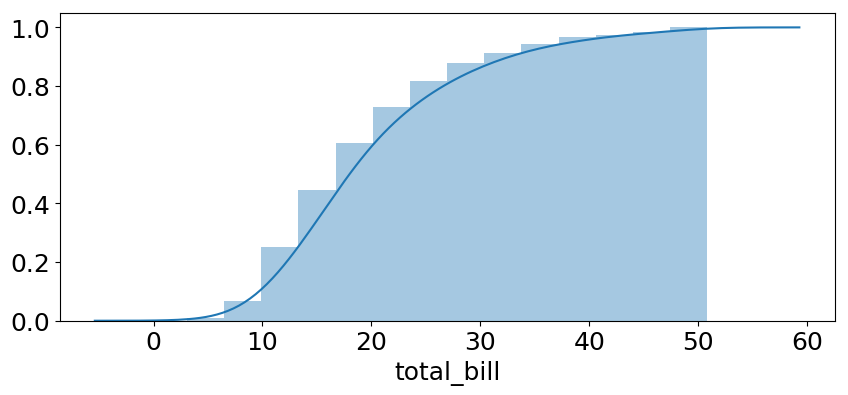

In [20]:
sns.distplot(x, hist_kws={'cumulative': True}, kde_kws={'cumulative': True})  

## Summing up


Group discussion (2 minutes): 
- How did our tools perform? 
- Which one seems most adequate for exploratory analysis? Which one for explanatory?
- Which steps could be taken towards improving our histograms?

## Sources of learning
- Required on reading list: other great sources exist
    - E.g. Greg Reda, Intro to Pandas
    - Datacamp tutorials
    - Youtube videos


# Plotting one categorical variable


## Univariate categorical


*What is categorical data? How can we plot categorical data?*

Pies are possible but of little use. Let's plot this with bars:

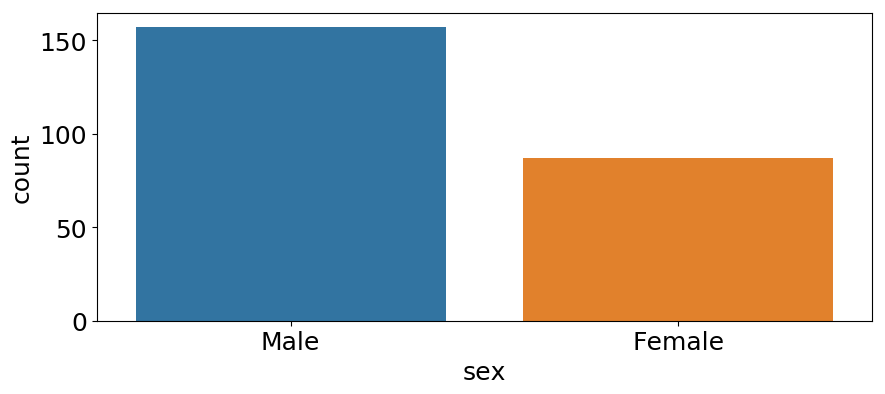

In [21]:
sns.countplot(x='sex', data=tips)

# Plotting DataFrames

## Table format

*How did we define a tidy/long table?*

One row for each observation

<center><img src='https://raw.githubusercontent.com/abjer/sds2017/master/slides/figures/tidy.png'></center>

# Plots of two numeric variables

## Two numeric variables (1)
*How do we plot two numeric variables?*

If we have little data we can make a point cloud, i.e. a scatter plot.

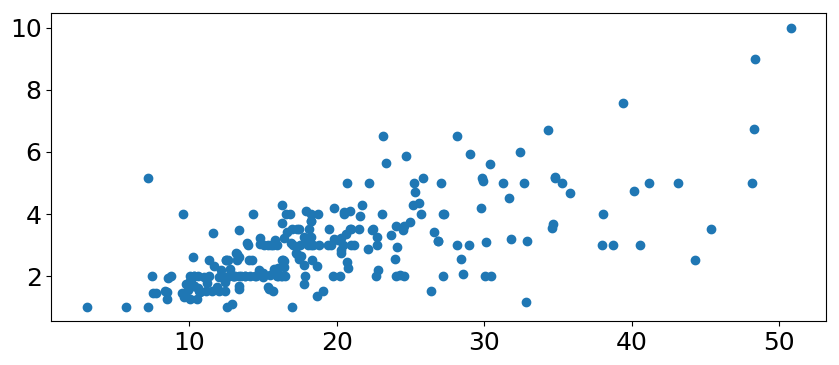

In [22]:
plt.scatter(x=tips['total_bill'], y=tips['tip'])

## Two numeric variables (2)
*Quiz: How might we alter the scatter plot?*

We can interpolate the data:

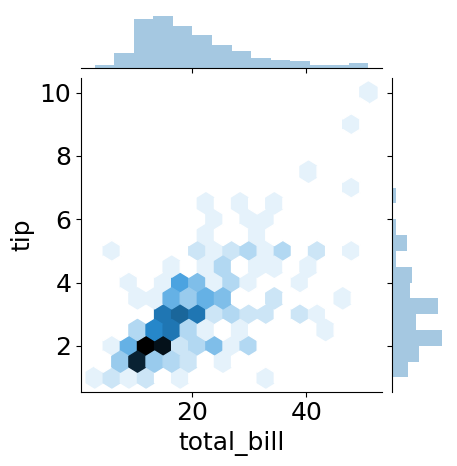

In [24]:
sns.jointplot(x='total_bill', y='tip', data=tips, kind='hex', size=5) # hex

## Two numeric variables (3)
*What if we want to see the linear relationship?*

We use the linear model plot:

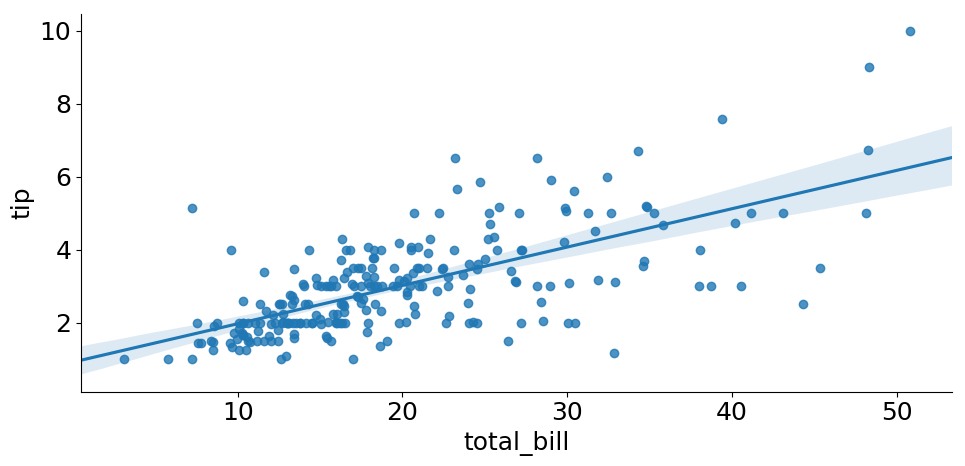

In [25]:
sns.lmplot(x='total_bill', y='tip', data=tips, size=5, aspect=2) 

# Plots with categorical variables

## Mixed types - numeric, categorical (1)

*Quiz: What is tidy format?*

- One row per observation

*How might we use categorical variables?*


- We can split data!

*In which plots might this be useful?*


- We can compute mean for each categorical variables, the `barplot`.
- We can compute quartiles for each categorical variables, the `boxplot`.

## Mixed types - numeric, categorical (2)

Let's make a plot the mean tips - distinguish by weekday:

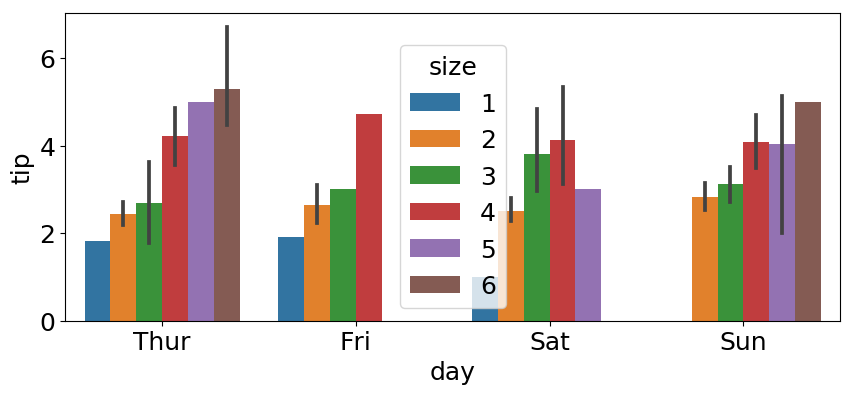

In [27]:
f = sns.barplot(x='day', y='tip', hue='size', data=tips)

## Mixed types - numeric, categorical (2)
Let's make a plot the tip quartiles - distinguish by sex:

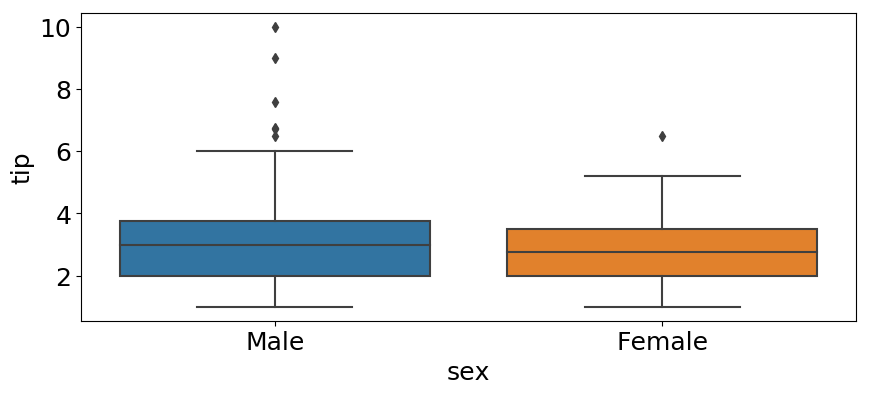

In [28]:
f = sns.boxplot(x='sex', y='tip', data=tips)

# Advanced exploratory plotting 

## Plot grids (1)

*How can we we plot the relationship for more than two variables?*

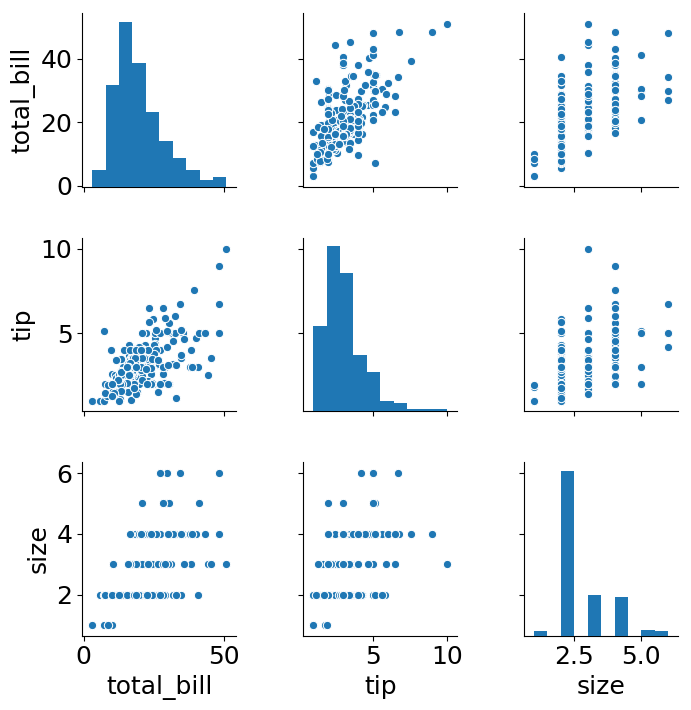

In [29]:
# A powerful method:
sns.pairplot(tips)

## Plot grids (2)

*Can we split the data to investigate heterogeneous relationships?*

Yes, let's starting building a FacetGrid:

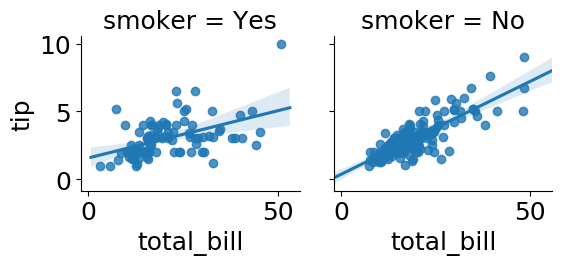

In [31]:
g = sns.FacetGrid(tips, col='smoker')
g = g.map(sns.regplot, 'total_bill', 'tip')

## Plot grids (3)

Let's try to add distinctive slopes for smoker

In [ ]:
g = sns.FacetGrid(tips, col='smoker') # time
g = g.map(sns.regplot, 'total_bill', 'tip')

Can we say anything about smokers tipping behavior?

## Bring it on!!

UN and Google has launched a [data visualization competition](https://cloud.google.com/visualize-2030):

- Goal: Sustainable Development Goal interdependence
- Only for students
- Prize: 10,000$
- Caveat: Must use Google Data Studio

# Code for plots

### Histogram

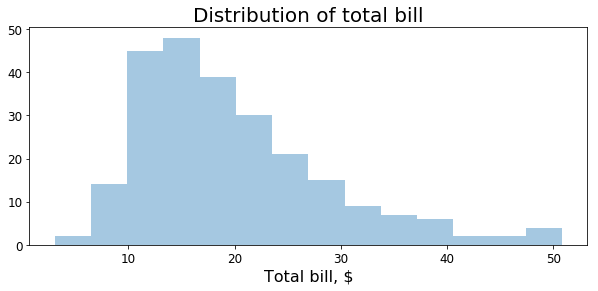

In [11]:
import warnings

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

warnings.filterwarnings("ignore")

histplot,ax = plt.subplots(1, 1, figsize=(10,4))
sns.distplot(sns.load_dataset('tips').total_bill, kde=False, ax=ax)
ax.set_title('Distribution of total bill')
ax.set_xlabel('Total bill, $')
ax.title.set_fontsize(20)
ax.xaxis.label.set_fontsize(16)
    
for item in ax.get_yticklabels()+ax.get_xticklabels():
    item.set_fontsize(12)    

# The end

[Return to Agenda](#Agenda)